# Starter pack for Image Processing
&copy; Dr Jane Courtney &amp; Jack O'Neill 2023

A collection of helpful snippets for any image processing project using OpenCV and Python.

## Required Packages

The latest version of each of these packages should work, here is the list of packages needed and the version of the package used in generating this notebook. (To check which version you've installed you can use the pip **show** command, for example **updated**

```
pip show opencv-contrib-phython
```

* opencv-contrib-python @ 4.7.0.72
* numpy @ 1.24.2
* matplotlib @ 3.7.0

To install a specific version of a package using pip just add ==\<version number\> to the end of the command. For example, to install opencv-contrib-python at version 4.7.0.72 run

```
pip install opencv-contrib-python==4.7.0.72
```

It's important to state which versions you used in order to make your code reproducible. However, usually packages are backward compatible, so just install the latest version of each package, but if you run into issues it's good to try running the notebook using the versions it was built with

## Running Terminal Commands from Notebook

Jupyter Notebook allows you to use the magic symbol **!** to run commands directly in the terminal. This is particularly useful if you have multiple versions of Python installed as it helps ensure that any pip packages you installed are linked to the correct python version.

If a cell starts with an exclamation mark, it will be interpreted as a console command. For example, to show the version of opencv-contrib-python using pip we can do the following

*Note* Jupyter doesn't handle interactive input very well with terminal commands. This makes it tricky to run commands which require you to enter *y* to confirm, for example. Most commands can be run with a **-y** option which automatically answers yes to any confirmation prompts

In [24]:
!pip show opencv-contrib-python

Name: opencv-contrib-python
Version: 4.10.0.84
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /Users/xsmoked/miniforge3/lib/python3.10/site-packages
Requires: numpy, numpy, numpy, numpy, numpy
Required-by: 


## Matplotlib Magic

There are a couple of options for how to make jupyter notebook work with matplotlib. The most straightforward way (and most common use-case) is to tell jupyter to output any matplotlib graphs directly below the cell where we call the **show()** function. You can set this by using a bit of magic. The first line of your notebook should read

```
%matplotlib inline
```

This is specific to Jupyter notebook and doesn't work in a regular python script. If you are having problems where matplotlib graphs aren't appearing, make sure you've added this line (and run it)

In [25]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui (mac not supported)

## Reading Images

Opening an image from a file, this is best used when you can hard-code the filename

In [26]:
I = cv2.imread("zardoz.jpg")

Opening an image using a *FilePicker* dialog. Note that the *filetypes* argument is required on MacOS, otherwise the dialog won't allow the user to pick any type of file, on Windows machines if you leave the filetypes argument blank it will by default allow all.

In [27]:
f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
print(f)
I = cv2.imread(f)

/Users/xsmoked/Desktop/ImageProcessing/orange.png


### From Videos

A video is essentially a whole bunch of images (frames) shoved into a single file. The cv2 *read()* function allows us to extract the next still-frame from a video. The following snippet reads a video file and extracts the first image from it.

In [28]:
Video = cv2.VideoCapture("Zorro.mp4")
(check, I) = Video.read()

We can also capture frames from a webcam. OpenCV treats a webcam as if it's a video file. If we pass a number rather than a string to the *VideoCapture()* function openCV will look for a device attached to the computer rather than the file. The number we pass identifies the device (0 is the first camera, 1 is the second camera *etc.*)

	09-18-2024  15:41:20.257 @@@@===RelayStream:: set kCMIOStreamPropertyFormatDescription sub=2vuy w=1280 h=720
	09-18-2024  15:41:20.253 Local Camera start, ret=0


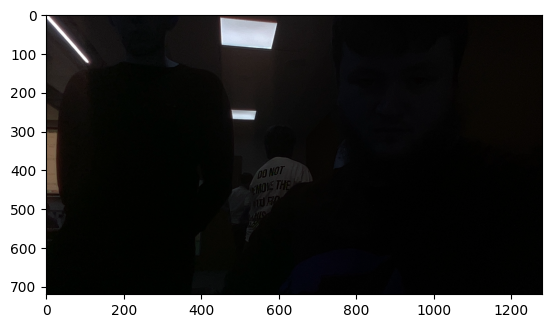

In [29]:
Video = cv2.VideoCapture(0)
(check, I) = Video.read()

plt.imshow(I)

We can use a loop to iterate through every image in the video one-by-one. Don't forget to allow the user to break out of the loop if required. It's also important to release the video once finished

In [30]:
# Video capture from a file:
Video = cv2.VideoCapture("Zorro.mp4")
(check, I) = Video.read()

while check:
    cv2.imshow("image", I)
    
    # This delays for 1ms while waiting for a key to be pressed
    key = cv2.waitKey(1)

    # if the 'q' keqy is pressed, quit:
    if key == ord("q"):
         break

    # Next Frame:
    (check, I) = Video.read()

Video.release()

## Writing Images

The imwrite function saves an image to disk. You won't see any output from the command, but if you open up the folder you should see the new file.

In [31]:
cv2.imwrite("image_out.jpg",I)

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


: 

## Showing Images

Images can be shown using either OpenCV or MatPlotLib. Each approach has a different window with slightly different functionality. Remember that OpenCV uses the BGR image format while MatPlotLib uses RGB so you'll need to convert between colourspaces as needed.

If you use OpenCVs *imshow* function, make sure you make a call to waitKey to halt programme execution. Otherwise the programme will finish running before the image has a chance to pop up.

When using Jupyter it's **very important to manually destroy all cv2 windows** when you're finished with them. If you forget to do this, you can end up hanging the python kernel and needing to restart. Whenever you use *imshow()* make sure you add a call to *cv2.destroyAllWindows()*. You can see below that we put this in after a call to *waitKey()* to make sure that we have time to look at the image before we destroy it. This applies to open-cv only, and not matplotlib

In [9]:
# Show an image on the screen using OpenCV

cv2.imshow("window title", I)
key = cv2.waitKey(0) # the 0 here tells openCV to wait indefinitely (until a key is pressed)
cv2.destroyAllWindows()

# Unix systems require another call to cv2.waitKey after cv2.destoyAllWindows() to avoid a bug where the 
# window doesn't close. The 1ms timeout causes this to exit almost immediately so the user doesn't notice it
cv2.waitKey(1) 

-1

When using matplotlib you need to make sure you're using the right colourspace (RGB). The variable **plt** here was imported at the beginning of the notebook. Use *imshow()* to add the image to the plot but don't forget to call *plt.show()* to actually show the image

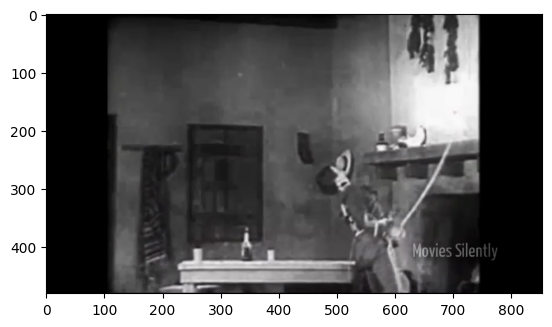

In [10]:
# Show an image on the screen using MatPlotLib
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I) 
plt.show() 

## Colourspaces

Colourspaces define the format that is used for storing information about images. The most common colourspace in computing is *RGB*, but OpenCV, in its wisdom, continues to use *BGR*. This can cause unexpected psychadelia when showing images

In [23]:
# Converting to different colour spaces:
RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
HSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
YUV = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Showing each image on the screen in a different window (OpenCV):
cv2.imshow("Original", I)
cv2.imshow("HSV", HSV)
cv2.imshow("YUV", YUV)
cv2.imshow("Grayscale", G)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey(1) 

-1

## Pixels

Fundamentally, an image is nothing more than an array of values describing how to generate colour at various pixel locations. We can use standard Python and numPy methods of dealing with arrays to manipulate pixels directly.

**Avoid looping through image arrays where possible**. Using slice indexing and *numpy* methods to work with images is highly optimized. Looping through images leads to horrificly bad performance (and it's unreadable).

In [14]:
# Accessing a pixel's value:
B = I[200,300,0]
BGR = I[200,300]
print("The blue value @ (200,300) is ", B)
print("The pixel value @ (200,300) is ", BGR)

# Setting a pixel's value:
I[200,300,0] = 255
I[205,300] = (255,0,0)
cv2.imwrite("image.bmp",I)

# Using the colon operator:
I[190:210,190:210] = (0,255,0)
Pixel = I[200,200,:]
print("The pixel value @ (200,200) is ", Pixel)

The blue value @ (200,300) is  41
The pixel value @ (200,300) is  [41 41 41]
The pixel value @ (200,200) is  [  0 255   0]


## Drawing

OpenCV provides some convenience functions to allow you to draw on top of images. Useful for annotations *etc.*

In [21]:
# Keeping a copy:
Original = I.copy() 

# Drawing a line:
cv2.line(img = I, pt1 = (200,200), pt2 = (500,600), color = (255,255,255), thickness = 5) 

# Drawing a circle:
cv2.circle(img = I, center = (800,400), radius = 50, color = (0,0,255), thickness = -1)

# Drawing a rectangle:
cv2.rectangle(img = I, pt1 = (500,100), pt2 = (800,300), color = (255,0,255), thickness = 10)

# Getting the size of the image:
size = np.shape(I)

## User Input

In [22]:


# Capturing user input:
def draw(event,x,y,flags,param): 
    if event == cv2.EVENT_LBUTTONDOWN: 
        cv2.circle(img = I, center = (x,y),radius = 5, color = (255,255,255), thickness = -1) 
        cv2.imshow("image", I) 

cv2.namedWindow("image") 
cv2.setMouseCallback("image", draw) 
cv2.imshow("image", I)
key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Submission Requirements

Using the code in the cell above (feel free to copy and modify as appropriate)

1. Download the file googly.jpg from Brightspace
2. Load the image into Open-CV (you can hard-code the name)
3. Run the code and use it to draw three green circles on the image with a radius of 10 pixels

In [20]:
I = cv2.imread("googly.jpg")

cv2.circle(img = I, center = (100,400), radius = 10, color = (0,255,0), thickness = -1)

cv2.circle(img = I, center = (500,400), radius = 10, color = (0,255,0), thickness = -1)

cv2.circle(img = I, center = (300,400), radius = 10, color = (0,255,), thickness = -1)

#Showing the image:
cv2.imshow("image", I)

key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1